## Classical Machine Learning: Classification Algorithms.


***

We will use the [Palmer's Penguins dataset](https://github.com/allisonhorst/palmerpenguins) and create different models for classifying the dataset by species.




![](https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/lter_penguins.png)

We will use the [scikit-learn library](https://scikit-learn.org/stable/index.html) functions for [Supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) cases.

***


We first load all the required libraries to the running environment:

In [40]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Specific scikit-learn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
import sklearn.metrics

import warnings
warnings.filterwarnings('ignore')


In [3]:
# Read the Penguins dataset fom Github and define a Pandas dataframe

filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/penguins/penguins_size.csv"
df_dist = pd.read_csv(filename)
df_dist.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Data cleaning and manipulation


We will use the [Pandas Library](https://pandas.pydata.org/docs/reference/index.html) for data cleaning and manipulation.

(Please review the basics of [Pandas](https://github.com/ua-datalab/Workshops/wiki/Data-Wrangling-101:-Pandas-in-Action) from our learning resources page)
***

### Data manipulation and cleaning

Check for missing values and appropriate data type of the variables

In [4]:
# Inquiry about the state of the original distribution dataset

df_dist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# Check if there are any missing values (isnull)

df_dist.isnull().any()


,0
species,False
island,False
culmen_length_mm,True
culmen_depth_mm,True
flipper_length_mm,True
body_mass_g,True
sex,True


# 📘 Handling Missing Data – Notes

https://www.kaggle.com/code/kenjee/dealing-with-missing-values-section-5-1
---

## 🔹 Why It Matters
- Missing data can significantly affect the accuracy and generalisation of your model.
- The way you handle it should depend on the **data type**, **context**, and **proportion** of missingness.
- Some methods are simple but can introduce bias or distortions if applied blindly.

---

## 🔸 1. Dropping Nulls
- **Remove** rows or columns with missing values.
- Useful when:
  - The amount of missing data is very small.
  - The missing values appear randomly.
- ⚠️ Be cautious: This may lead to **data loss** and biased analysis if not handled carefully.

---

## 🔸 2. Mean / Median / Mode Imputation
- Fill missing values with:
  - **Mean** (for continuous numerical data).
  - **Median** (for skewed numerical data).
  - **Mode** (for categorical data).
      the mode is the most frequent (common) value in a dataset.
- Advantages:
  - Simple and fast.
  - Maintains dataset size.
- Limitations:
  - Doesn’t account for relationships between features.
  - Can reduce variance and introduce bias.

---

## 🔸 3. Regression Imputation
- Predict missing values using a regression model based on other features.
  - e.g., **Linear Regression**, **Random Forest Regressor**
- Captures inter-feature correlations.
- More accurate for complex datasets.
- ⚠️ Requires careful implementation to avoid data leakage.

---

## 🔸 4. Nearest Neighbor Imputation
- Use **K-Nearest Neighbors (KNN)** to find similar instances.
- Missing values are imputed based on the nearest complete rows.
- Benefits:
  - Captures local data patterns.
  - Better performance in datasets with nonlinear relationships.
- Drawback:
  - Computationally expensive on large datasets.

---

## 🔸 🛑 Important Note on Zero Values
- Do **not blindly replace** missing data with **zero**.
- In some cases, zero is a **valid value** (e.g., a sensor reading).
- Always understand the **domain context** before deciding on imputation.

---

## ✅ Summary
- Different situations require different imputation techniques.
- Use:
  - **Dropping** for small, random missingness.
  - **Mean/Median/Mode** for simplicity.
  - **Regression/KNN** for more accurate estimates.
- Always combine imputation with **domain knowledge**.


In [43]:
# Eliminate the rows with missing values (dropna), and define a new dataframe df

df = df_dist.dropna(axis = 0, how ='any')


In [44]:
# Should have a clean dataframe with no missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


### Label encoding of categorical variables

We can use Scikit-learn built-in function: [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to encode the categorical values into numeric values.

The categorial variables in our case are:
- species
- island
- sex


***

We can use the dataframe [value_counts function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts) to count values in each variable.  

In [8]:
# See the different values of the above variables

print('Species: \n', df.species.value_counts())
print('Island: \n', df.island.value_counts())
print('Gender: \n', df.sex.value_counts())


Species: 
 species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64
Island: 
 island
Biscoe       164
Dream        123
Torgersen     47
Name: count, dtype: int64
Gender: 
 sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


There is a row where the gender of the penguin has value of ".", then we need to eliminte that row, using a filter condition.

In [9]:
# Keep or filter out all rows where the sex of the Penguins is not equal to '.'

df = df[df.sex != '.']
print('Gender: \n', df.sex.value_counts())


Gender: 
 sex
MALE      168
FEMALE    165
Name: count, dtype: int64


In [10]:
# We check the status of our dataframe

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


We are ready to encode the categorical variables

In [11]:
# Ready to encode categorical variables (encode names with values)

le = LabelEncoder()

df['species_encoded']= le.fit_transform(df['species'])
df['island_encoded']= le.fit_transform(df['island'])
df['sex_encoded']= le.fit_transform(df['sex'])
print(df.head())


  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  species_encoded  island_encoded  sex_encoded  
0       3750.0    MALE                0               2            1  
1       3800.0  FEMALE                0               2            0  
2       3250.0  FEMALE                0               2            0  
4       3450.0  FEMALE                0               2            0  
5       3650.0    MALE                0               2            1  


So, now the values of the encoded variables are:

`species_encoded` = [0,1, or 2];
`island_encoded` = [0,1, or 2]; and `sex_encoded` = [0 or 1]


## Checking for outlier values in the dataset

https://www.kaggle.com/code/kenjee/dealing-with-outliers-section-5-2

[John Tukey](https://en.wikipedia.org/wiki/John_Tukey) also gives a criteria for defining outlier data. If _Q1_, and _Q3_ are the first and third quartile positions, the interquartile range _IQR = Q3 - Q1_ , then an outlier value will fall below _Q1 - 1.5 IQR_ or above _Q3 + 1.5 IQR_.

We can define an additional Tukey outer fences, lower outer fence _Q1 - 3.0 IQR_ and the upper outer fence above _Q3 + 3.0 IQR_.


![](https://camo.githubusercontent.com/12ec987141cca879108f558c86b64a20fc7370e66de248813393fa5117f06907/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f76322f726573697a653a6669743a313430302f312a552d72524e6c54684c447a647059716e4930524131772e706e67)

|--- Extreme Low ------|------Mild Low ---|====== Normal ======|----- Mild High ---|------ Extreme High ------|

    Q1 - 3*IQR       Q1 - 1.5*IQR      Q1 --- Q3        Q3 + 1.5*IQR   Q3+ 3*IQR


In [12]:
#Tukey's method

def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    ifl, ifu = inner_fence_le, inner_fence_ue

    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    ofl, ofu = outer_fence_le, outer_fence_ue


    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss, ifl, ifu, ofl, ofu



In [13]:
# Check for outliers in each numeric variable: culmen length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [14]:
# Check for outliers in each numeric variable: culmen depth

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'culmen_depth_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [15]:
# Check for outliers in each numeric variable: flipper length

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'flipper_length_mm')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


In [16]:
# Check for outliers in each numeric variable: body mass

probable_outliers_tm, possible_outliers_tm, ifl, ifu, ofl, ofu = tukeys_method(df, 'body_mass_g')
print(len(probable_outliers_tm))
print(len(possible_outliers_tm))

0
0


There are no outliers.

***

## Visualizing the data

We will use the [Matplotlib.Pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) and [Seaborn](https://seaborn.pydata.org/) libraries.

Remember we are using the aliases (see first code cell):
```
import matplotlib.pyplot as plt
import seaborn as sns
```
The specific functions used below are:
* [matplotlib.pyplot.subplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.subplot.html). Add an Axes to the current figure or retrieve an existing Axes.
* [matplotlib.pyplot.show](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.show.html). To display all open figures.
* [seaborn.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot). Plot univariate or bivariate histograms to show distributions of datasets.
* [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html). Show point estimates and errors as rectangular bars.



In [17]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0,2,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0,2,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0,2,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0,2,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0,2,1


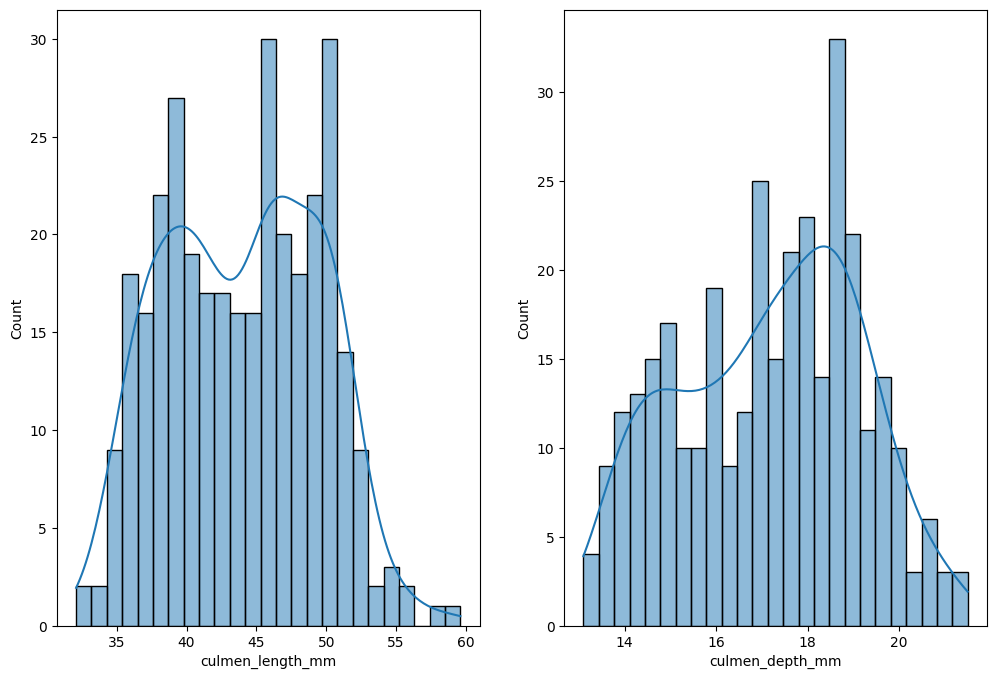

In [18]:
# Plot data frequency distribution for first two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['culmen_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['culmen_depth_mm'], bins=25, kde=True, ax=ax2);
plt.show()


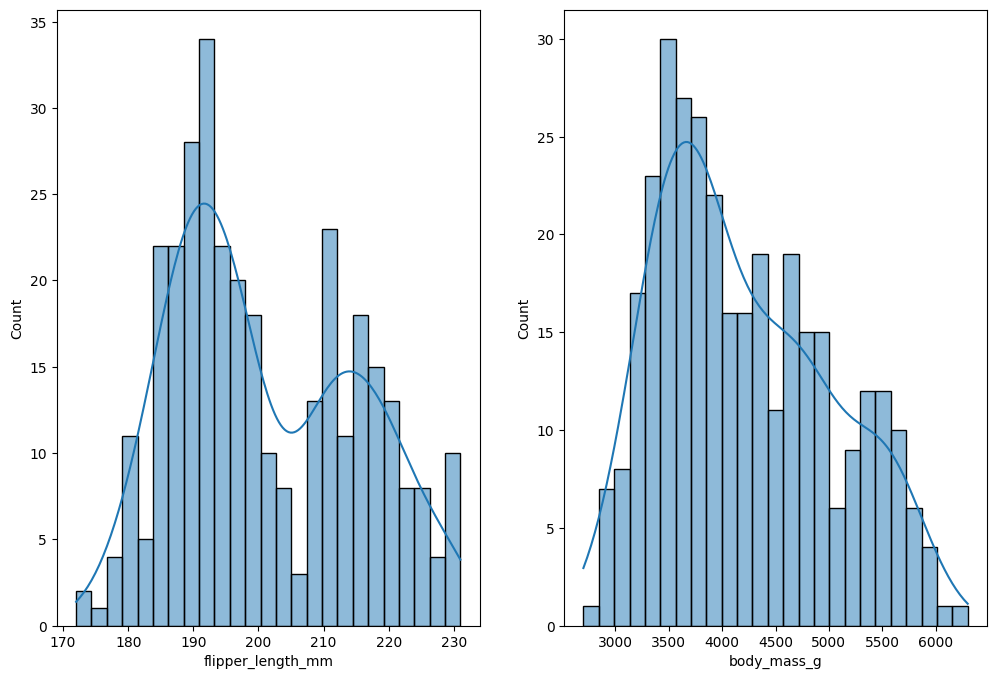

In [19]:
# Plot data frequency distribution for last two variables

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(df['flipper_length_mm'], bins=25, kde=True, ax=ax1);
sns.histplot(df['body_mass_g'], bins=25, kde=True, ax=ax2);
plt.show()


### Separating by species

We get a more detailed data distribution plot

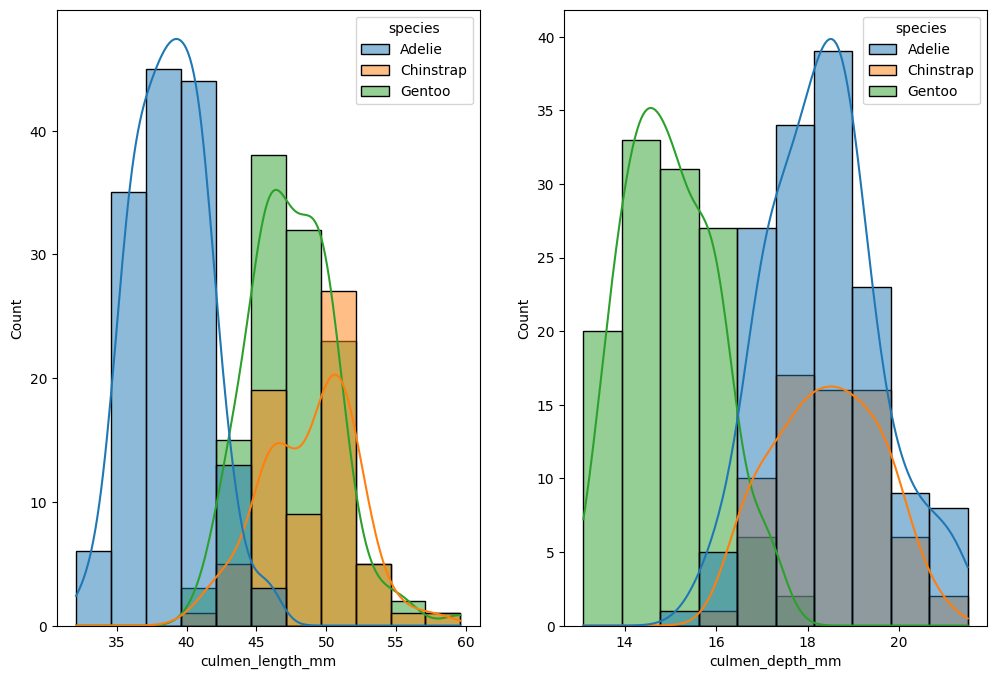

In [20]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(data=df, x="culmen_length_mm", hue="species", kde=True, ax=ax1);
sns.histplot(data=df, x="culmen_depth_mm", hue="species", kde=True, ax=ax2);
plt.show()



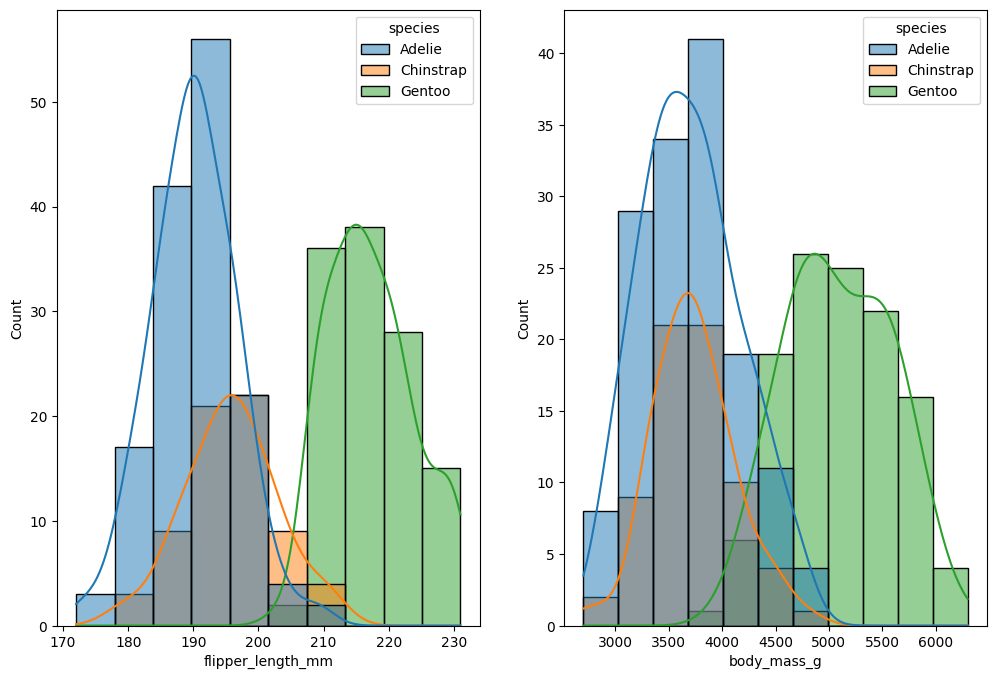

In [21]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12, 8))

sns.histplot(data=df, x="flipper_length_mm", hue="species", kde=True, ax=ax1);
sns.histplot(data=df, x="body_mass_g", hue="species", kde=True, ax=ax2);
plt.show()


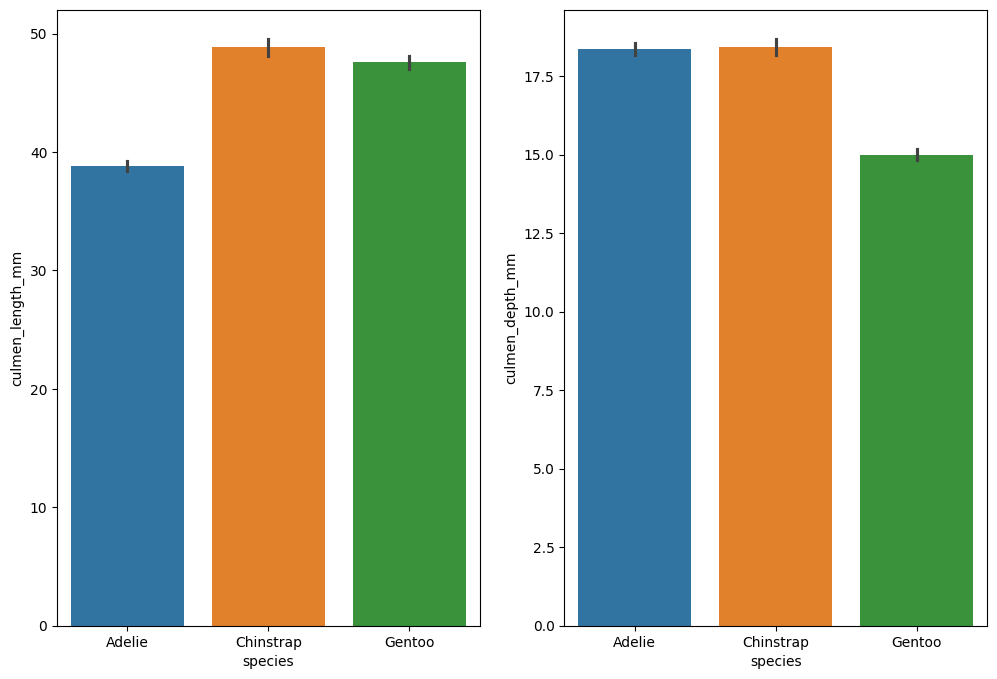

In [22]:
# Using barplots.

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='culmen_length_mm', data=df, ax=ax1, hue='species')
sns.barplot(x='species', y='culmen_depth_mm', data=df, ax=ax2, hue='species')

plt.show()


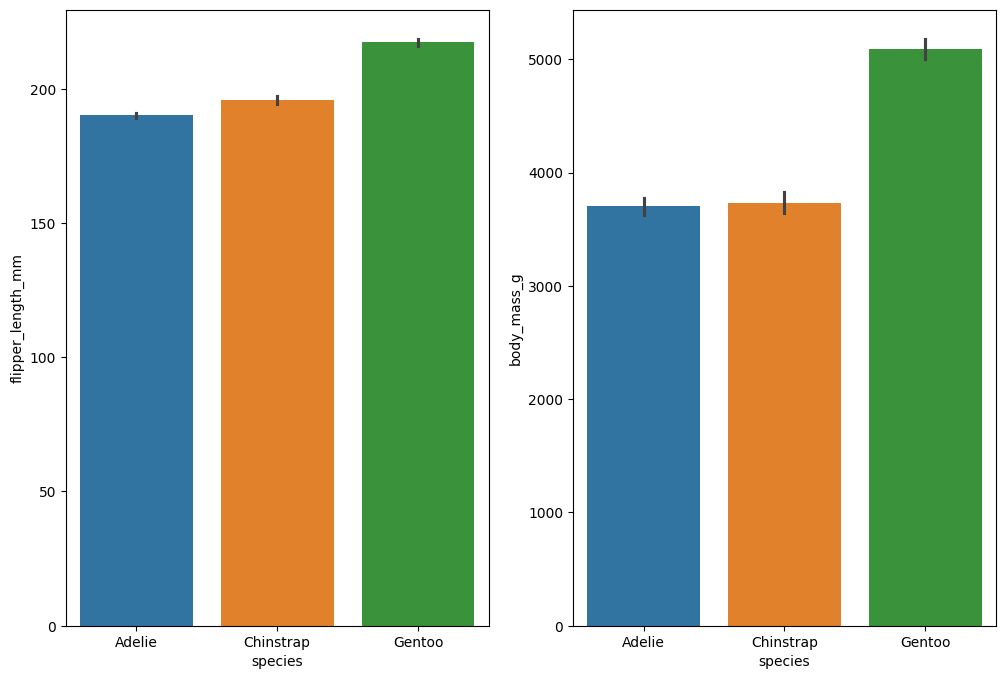

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

sns.barplot(x='species', y='flipper_length_mm', data=df, ax=ax1,hue='species' )
sns.barplot(x='species', y='body_mass_g', data=df, ax=ax2, hue='species')

plt.show()


## Splitting the data into Training & Testing datasets

Now, we continue with training for our classification model, classifying penguins by gender (target variable).

We use the Scikit-learn [train_test_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), to split arrays or matrices into random train and test subsets.

Usually, 80% of the data is used for training the model and 20% for testing it. A `random_state` variable is set for reproducibility purposes.



![](https://camo.githubusercontent.com/1bb83b542fd6d874fdda26997b928be439506f4a0c1ee29aa39453b409d72fb5/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f76322f726573697a653a6669743a3732302f666f726d61743a776562702f312a535335316c61564e4148455849634a4479486b3369772e706e67)

In [24]:
features=['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g','island_encoded', 'species_encoded']

x=df[features]        # these are the features we define them as "x"
y=df['sex_encoded'] # the species gender is the output or label we'll call it as "y"

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

print("\n Shape of x_train:\n{}".format(x_train.shape))
print("\n Shape of x_test:\n{}".format(x_test.shape))
print("\n Shape of y_train:\n{}".format(y_train.shape))
print("\n Shape of y_test:\n{}".format(y_test.shape))



 Shape of x_train:
(266, 6)

 Shape of x_test:
(67, 6)

 Shape of y_train:
(266,)

 Shape of y_test:
(67,)


In [25]:
y_train.head()

,sex_encoded
230,0
84,0
303,1
22,0
29,1


## Scaling

We will next use the Scikit-learn [StandardScaler function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), to standardize features by removing the mean and scaling to unit variance, i.e. a normal distribution of `mean=0`, and  `stddev=1`, show in _red color_ below.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

# 📏 Why Do We Need Scaling / Normalization?

---

## 🔹 What is Feature Scaling?
Feature scaling is a technique to **standardize** or **normalize** the range of independent variables (features) in your data.

Different features may have different units or magnitudes (e.g., age in years vs. income in dollars), which can negatively affect model performance.

---

## 🔸 1. Algorithms Sensitive to Feature Magnitude

Some machine learning algorithms are sensitive to **the scale of data**, including:

- **K-Nearest Neighbors (KNN)**  
- **Support Vector Machines (SVM)**  
- **Principal Component Analysis (PCA)**  
- **Logistic Regression**  
- **Gradient Descent-based models** (like Linear Regression)

> These models use **distance** or **gradient updates**, which behave differently when features have large value differences.



Tree-based models are scale-invariant because they only care about splits, not magnitudes or distances. So, no scaling needed!
---

## 🔸 2. Faster and More Stable Convergence

- In gradient descent-based models (like Linear/Logistic Regression or Neural Networks), scaling helps the algorithm **converge faster**.
- Without scaling, features with larger values dominate updates, making learning **slower** or **unstable**.

---

## 🔸 3. Equal Feature Contribution

- Scaling ensures that **each feature contributes equally** to the model's learning.
- Prevents the model from giving more importance to features **just because** they have larger values.

---

## 🔸 4. Better Visualisations

- Scaled features are often easier to **visualize** and interpret using plots like scatter plots, PCA, or t-SNE.

---

## 🔹 Common Scaling Techniques

### ✅ Standardization (Z-score)
- Subtract the mean, divide by the standard deviation:


minimax score = x-min/(max-min)

In [46]:
# Apply the scaler transformation
sc = StandardScaler()

scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

print(x_train.head())
print("________________________ Transformed variables (first 5 rows) ____________________________________________________")
print(scaled_x_train[0:4])


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
230              40.9             13.7              214.0       4650.0   
84               37.3             17.8              191.0       3350.0   
303              50.0             15.9              224.0       5350.0   
22               35.9             19.2              189.0       3800.0   
29               40.5             18.9              180.0       3950.0   

     island_encoded  species_encoded  
230               0                2  
84                1                0  
303               0                2  
22                0                0  
29                0                0  
________________________ Transformed variables (first 5 rows) ____________________________________________________
[[-0.59372706 -1.75093934  0.9359428   0.53973681 -0.91721936  1.20687977]
 [-1.26104283  0.32310698 -0.719956   -1.07236416  0.52645135 -1.04596247]
 [ 1.09309891 -0.63803644  1.65589881  1.40779118 -0.917

## Training the models

We will train the following three Scikit-learn Classifier models for comparison:

* [KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Support Vector Classifier - SVC](https://scikit-learn.org/stable/modules/svm.html#classification)

In [41]:
# KNeaighbors Classifier model 1

x_trainSC=scaled_x_train
x_testSC=scaled_x_test


# Fit the model to training data
model1=KNeighborsClassifier(n_neighbors=3)
model1.fit(x_trainSC, y_train)

# Predict the response for test dataset
y_prediction1= model1.predict(x_testSC)

report=pd.DataFrame()
report['Actual values']=y_test
report['Predicted values']= y_prediction1
print(report)

# Decision Tree Classifier model 2

# Fit the model to training data
model2= DecisionTreeClassifier(max_depth=3)
model2.fit(x_trainSC,y_train)

# Predict the response for test dataset
y_prediction2 = model2.predict(x_testSC)
report['Actual values']=y_test
report['Predicted values']= y_prediction2
print(report)

# Support Vector Classifier model 3

# Fit the model to training data
model3= svm.SVC(kernel='linear',probability=True) # Linear Kernel
model3.fit(x_trainSC, y_train)

#Predict the response for test dataset
y_prediction3 = model3.predict(x_testSC)
report['Actual values']=y_test
report['Predicted values']= y_prediction3
print(report)


# logistic regression Classifier model 4

# Fit the model to training data
model4 = LogisticRegression()
model4.fit(x_trainSC, y_train)

# Predict the response for test dataset
y_prediction4 = model4.predict(x_testSC)
report['Actual values']=y_test
report['Predicted values']= y_prediction3
print(report)


     Actual values  Predicted values
30               0                 0
317              0                 0
79               1                 1
201              0                 1
63               1                 1
..             ...               ...
288              0                 0
4                0                 0
83               1                 1
319              1                 1
66               0                 0

[67 rows x 2 columns]
     Actual values  Predicted values
30               0                 0
317              0                 0
79               1                 1
201              0                 0
63               1                 1
..             ...               ...
288              0                 0
4                0                 0
83               1                 0
319              1                 1
66               0                 0

[67 rows x 2 columns]
     Actual values  Predicted values
30               0           

### Basic Model evaluation



In [42]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_prediction1)
print("Accuracy1 :", accuracy1)


accuracy2 = accuracy_score(y_test, y_prediction2)
print("Accuracy2 :", accuracy2)


accuracy3 = accuracy_score(y_test, y_prediction3)
print("Accuracy2 :", accuracy3)


accuracy4 = accuracy_score(y_test, y_prediction4)
print("Accuracy:", accuracy4)

Accuracy1 : 0.8955223880597015
Accuracy2 : 0.835820895522388
Accuracy2 : 0.8955223880597015
Accuracy: 0.8955223880597015
